In [3]:
import pandas as pd
cluster5df = pd.read_csv("final_dataset_cluster_5_onehot.csv")


In [4]:
cluster5df.columns

Index(['recipe_id', 'name', 'n_steps', 'n_ingredients', 'minutes', 'calories',
       'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)',
       'saturated fat (PDV)', 'carbohydrates (PDV)', 'user_id', 'date',
       'review', 'rating', 'review_cleaned', '5_no_cluster', 'cluster_1',
       'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5'],
      dtype='object')

In [5]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


def wordcloudmaker(df):
    word_cloud_text = ''
    for index, rows in df.iterrows():
        word_cloud_text += rows['review']

#     print(word_cloud_text)

    wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=1000, height=800,collocations=False).generate(word_cloud_text)
    plt.figure( figsize=(20,10) )

#     plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


#     print(wordcloud.words_.keys())

In [ ]:
for i in range(5):
    wordcloudmaker(cluster5df[cluster5df["5_no_cluster"] == i])

In [21]:

import pandas as pd
import re 
# spacy for lemmatization
import spacy
import scipy.sparse

# NLTK Stop words
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


# set stop words
stop_words = stopwords.words('english')

stop_words.extend(['easy','flavor','next','one','instead','little','much','added','time','great','really','made','used','thanks','can', 'hadn','run','each','re','until','der','would','such','ve','which','about','shan','seem','they','as','aren','above',"shouldn't",'say','few',"hasn't","mustn't",'use','ia','off','couldn','ma','go','ita','then','under','there','had','ll','what','against','when','lot','take','also','havena',"you'd",'himself','now','needn','aŒ','but','own','will','even',"won't",'me',"haven't",'das','because','her','een','think','see','herself','further','this','t','bit','any','rather','only','_','nice','a','come','good','so','him','want','too','theirs','y','need','right','ich','than','been','at','shouldn',"don't",'am','these','did','in','edu','its','didn','was','same','down','very','ours','know','between','is',"doesn't",'themselves','our','were','es','all','nor','won','he','d','wouldn','who','have','other','whom','your','lack','don''does','more','haven','before','those','be','not','to','line','wasn','most','may','after','once','over','yours','up',"you'll",'their','with','many','are','by',"shan't",'she','while','if','just','make','recipe','below','of','it','m', 'could',"weren't",'where',"you've","aren't",'hers','we','or','during','here','done',"didn't","that'll",'you','how',"isn't",'weren','doing',"mightn't",'ain','the','should','having','myself','for','itself',"needn't",'amp','an','isn','di','try','get','again','that','into','yourself','both','s',"hadn't",'yourselves','subject',"you're",'doesn',"wasn't", "it's", 'some', 'mightn', 'my', 'do',"she's",'them', 'and', 'through','has', 'from', 'hasn',"wouldn't", 'ourselves', 'being','why', 'no', 'i', 'out', 'o', "couldn't",'mustn','his', "should've", 'thank', 'on'])


for index,sent in cluster5df.iterrows():
                  
    # tokenize
    tokenized_review = word_tokenize(sent["review"])
    # standardize to lower case
    lower_review = [w.lower() for w in tokenized_review]
    # keep token words which are text
    text_words_only = [w for w in lower_review if re.search('^[a-z]+$',w)]
    text_stopremoved = [w for w in text_words_only if w not in stop_words]
    text_joined = " ".join(text_stopremoved)
    cluster5df.at[index,'clean_review'] = text_joined



In [22]:
cluster5df.head()

,recipe_id,name,n_steps,n_ingredients,minutes,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),...,review,rating,review_cleaned,5_no_cluster,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,clean_review
0,8694,margaret lefever s wonderful baked beans,10,6,315,326.2,13.0,75.0,14.0,28.0,...,I tried this recipe because it was the first s...,2,small quantity baked bean found starter doctor...,1.0,0,1,0,0,0,tried first small quantity baked bean found st...
1,5315,icy holiday punch,5,6,1440,54.5,0.0,50.0,0.0,0.0,...,I brought this to an office holiday party and ...,4,brought office holiday party everyone enjoyed,4.0,0,0,0,0,1,brought office holiday party everyone enjoyed
2,9014,cheesy potato skillet stuff,5,5,40,357.8,33.0,6.0,22.0,30.0,...,What a great quick & easy meal especially for ...,4,quick meal mushroom lovers,1.0,0,1,0,0,0,quick meal especially mushroom lovers
3,580,garlic mushroom sauce,10,7,36,120.3,9.0,4.0,30.0,3.0,...,Easy and tasty. Really made my steak special. ...,4,tasty steak special doreen,3.0,0,0,0,1,0,tasty steak special doreen
4,9492,chicken honey glazed,6,7,100,484.9,11.0,189.0,20.0,110.0,...,So easy and tasty. To make the clean-up even e...,4,tasty easier lined baking pan tinfoil sharing ...,1.0,0,1,0,0,0,tasty easier lined baking pan tinfoil sharing ...


In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


def cleanwordcloudmaker(df,i):
    word_cloud_text = ''
    for index, rows in df.iterrows():
        word_cloud_text += rows['clean_review']

#     print(word_cloud_text)

    wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=1000, height=800,collocations=False).generate(word_cloud_text)
    plt.figure( figsize=(20,10) )

#     plt.figure( figsize=(20,10), facecolor='k')
    name = "cluster"+str(i)
    plt.suptitle(name, fontsize=20, y = 1.05)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis("off")
#     plt.show()


#     print(wordcloud.words_.keys())

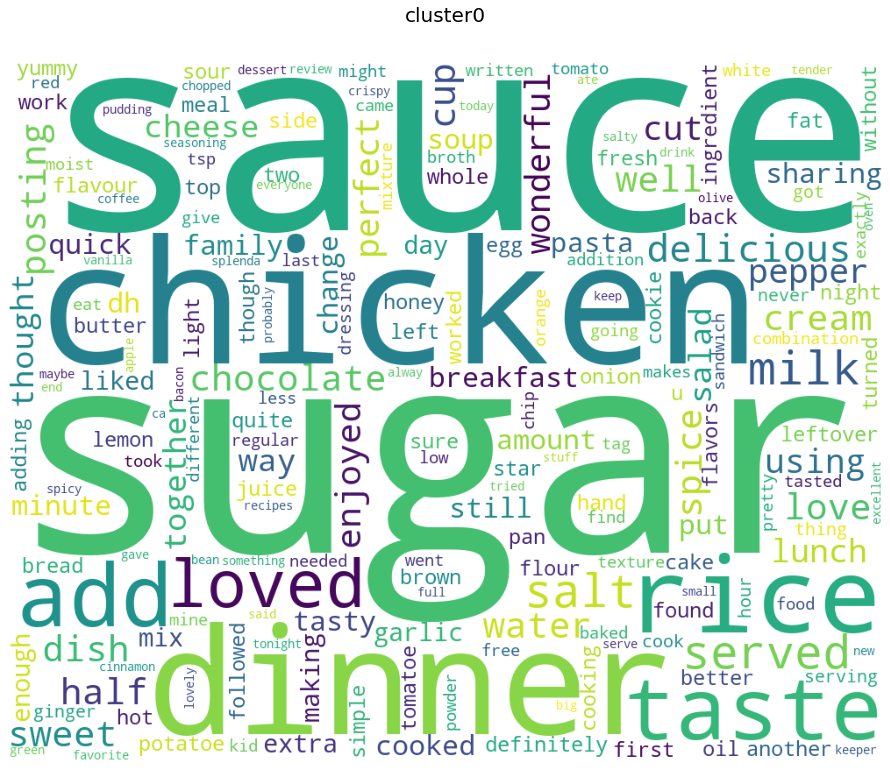

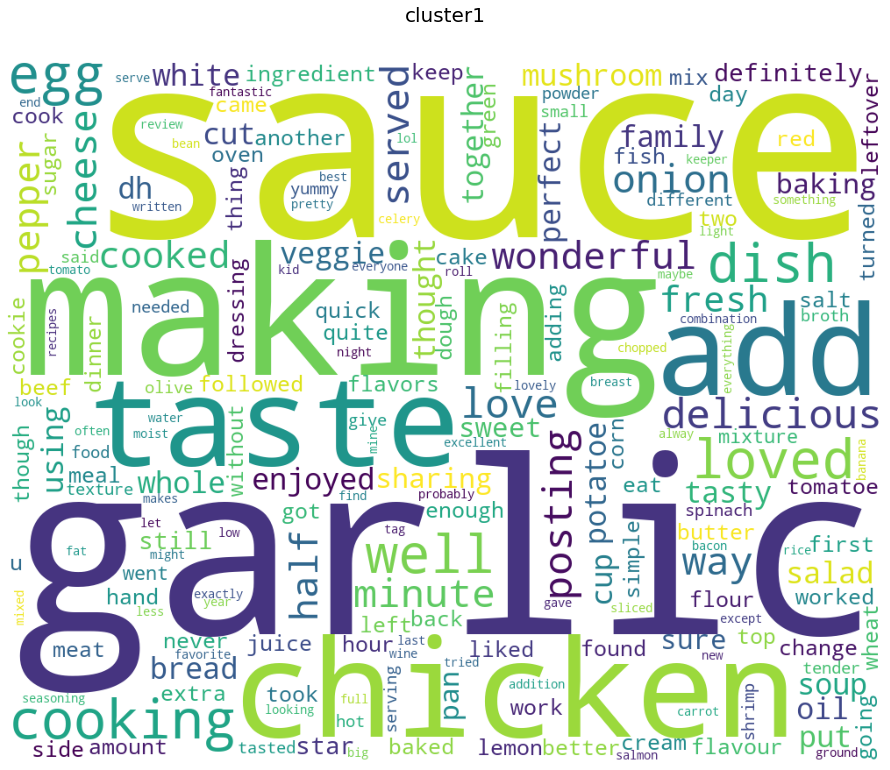

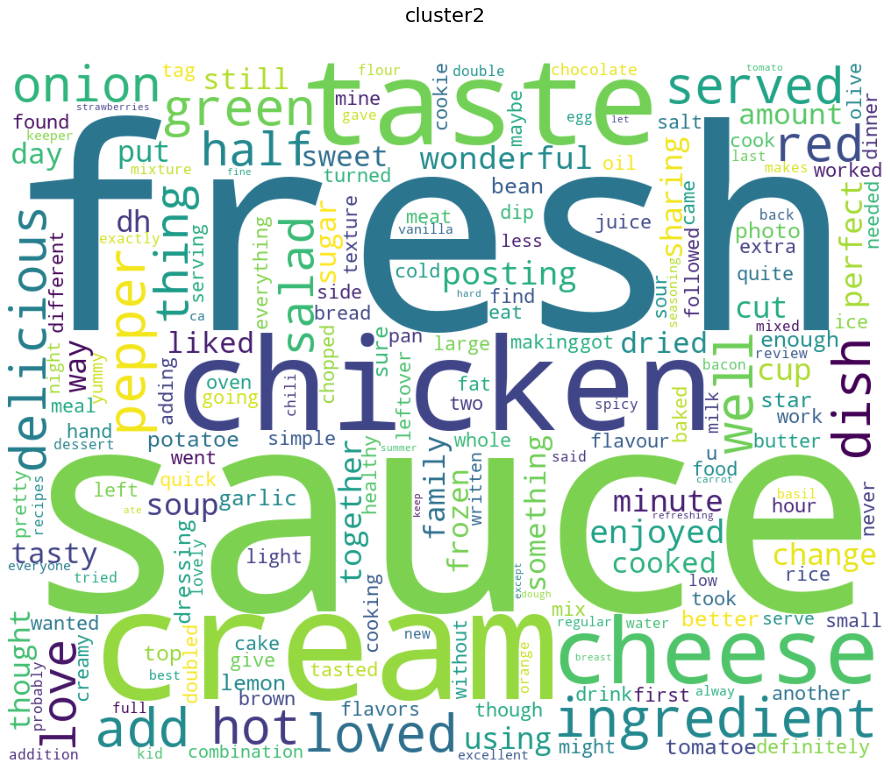

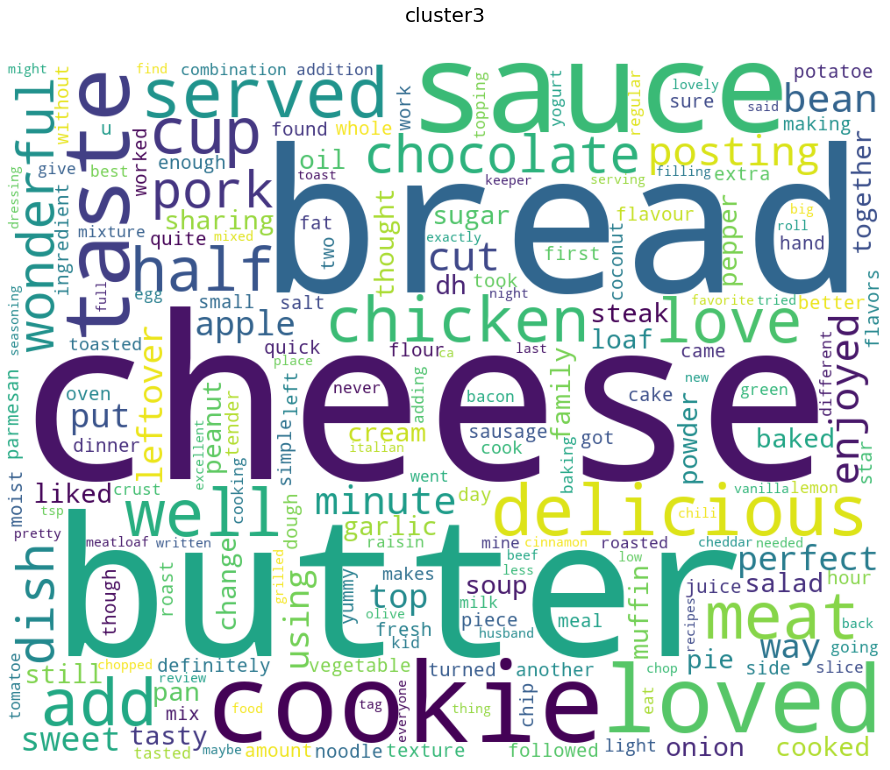

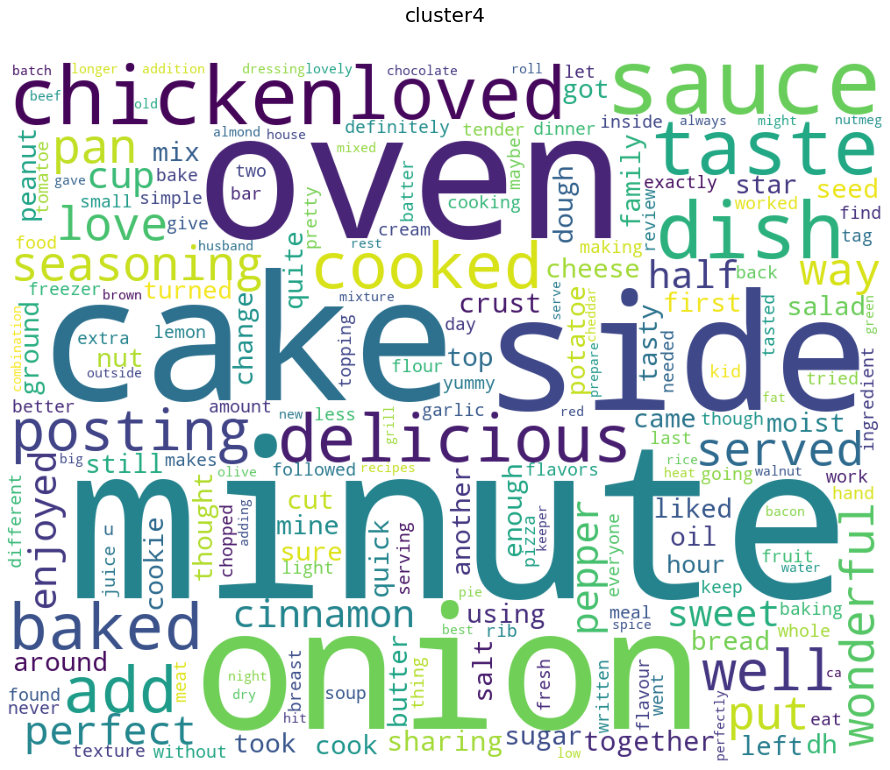

In [30]:
for i in range(5):
    cleanwordcloudmaker(cluster5df[cluster5df["5_no_cluster"] == i],i)

In [ ]:
# def sent_to_words(sentences):
#     for sentence in sentences:
#         yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# data_words = list(sent_to_words(newdata))

# print(data_words[:1])

In [ ]:
# # Build the bigram models
# bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10) # higher threshold fewer phrases.

# # Faster way to get a sentence clubbed as a bigram
# bigram_mod = gensim.models.phrases.Phraser(bigram)

# def make_bigrams(texts):
#     return [bigram_mod[doc] for doc in texts]

# # Form Bigrams
# data_words_bigrams = make_bigrams(data_words)


In [ ]:
# def lemmatization(texts, allowed_postags=['NOUN']):
#     """"""
#     texts_out = []
#     for sent in texts:
#         doc = nlp(" ".join(sent)) 
#         texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
#     return texts_out

# # Initialize spacy 'en' model, keeping only tagger component
# # For normal use
# # !python -m spacy download en_core_web_sm
# # nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# # For Colab use
# import en_core_web_sm
# nlp = en_core_web_sm.load()

# print("Before Lemmatization:", data_words_bigrams[:1])

# # Do lemmatization keeping only noun
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'PROPN',"ADJ"])

# print("After Lemmatization: ", data_lemmatized[:1])


In [ ]:
# # Remove urls (remove a word starting with http)
# data = [re.sub(r'@\w+', '', sent) for sent in data]
# data = [re.sub(r'http\S+', '', sent) for sent in data]

# nltk.download('punkt')
# nltk.download('stopwords')

# # set stop words
# stop_words = stopwords.words('english')
# stop_words.extend(["thank","thanks","great","way","dh","wonderful"])
# stop_words.extend(['thank', 'bit', 'recipe', 'from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'lot', 'lack', 'make', 'di', 'havena', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come', 'from', 'subject', 're', 'edu', 'use', 'amp', 'een', 'ia', 'es', 'ich', 'das', 'ita', 'ich', 'das', 'der', 'aŒ'])


# newdata = []
# for data_sent in data_lemmatized:

#     text_stopremoved = [w for w in data_sent if w not in stop_words]
#     newdata.append(text_stopremoved)
# # newdata[:5]